## Introdução

Esse notebook contém a utilização do algoritmo de clusterização <i>Spectral Clustering<i>.

### Pré Processamento

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

In [2]:
import pandas as pd

i=0;
skiprows = []
for i in range(0,20):
    skiprows.append(i)
    i=i+1
    
print('Linhas ignoradas do arquivo (Cabeçalho):{}'.format(skiprows))

df = pd.read_csv('aps_failure_training_set.csv', skiprows=skiprows)

df.head()

Linhas ignoradas do arquivo (Cabeçalho):[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [3]:
import numpy as np

df.replace({'na': np.nan}, inplace=True, regex=True)
df.isnull().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
ae_000     2500
af_000     2500
ag_000      671
ag_001      671
ag_002      671
ag_003      671
ag_004      671
ag_005      671
ag_006      671
ag_007      671
ag_008      671
ag_009      671
ah_000      645
ai_000      629
aj_000      629
ak_000     4400
al_000      642
am_0        629
an_000      642
ao_000      589
ap_000      642
aq_000      589
ar_000     2723
as_000      629
at_000      629
          ...  
dl_000     4008
dm_000     4009
dn_000      691
do_000     2724
dp_000     2726
dq_000     2726
dr_000     2726
ds_000     2727
dt_000     2727
du_000     2726
dv_000     2726
dx_000     2723
dy_000     2724
dz_000     2723
ea_000     2723
eb_000     4007
ec_00     10239
ed_000     9553
ee_000      671
ee_001      671
ee_002      671
ee_003      671
ee_004      671
ee_005      671
ee_006      671
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int6

In [4]:
from sklearn.preprocessing import Imputer

df = df.drop('class', axis=1)

imputer = Imputer(missing_values=np.nan, strategy='median', axis=0)
for column in df:
    df[[column]] = imputer.fit_transform(df[[column]])
    
df.isnull().sum()

df.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


## Experimento

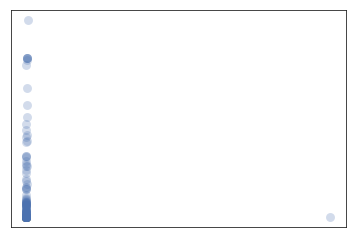

In [5]:
import seaborn as sns

%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

plt.scatter(df.T[0], df.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [ ]:
from sklearn import cluster

spectral = cluster.SpectralClustering(n_clusters=2,affinity="nearest_neighbors")

spectral.fit(df)

plt.scatter(df.T[0], df.T[1], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

/home/marianapicolo/UnB/ML/Jupiter/lib/python3.5/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


## Referências

>[Spectral Clustering for Begginers](https://towardsdatascience.com/spectral-clustering-for-beginners-d08b7d25b4d8)   
>[Spectral Clustering](https://whyml.wordpress.com/2016/07/26/spectral-clustering/)   
>[Clustering text documents using k-means](https://scikit-learn.org/stable/auto_examples     /text/document_clustering.html#sphx-glr-auto-examples-text-document-clustering-py)    
>[Comparing Clustering Algorithms](https://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html#spectral-clustering)     
>[Spectral Clustering a graph in python](https://stackoverflow.com/questions/46258657/spectral-clustering-a-graph-in-python)